In [1]:
import roboticstoolbox as rtb
import numpy as np
import sympy as sp
import pandas as pd
import csv
import os
import random
from spatialmath.base import *

In [15]:
def sTrasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = sp.Matrix([[1,0,0,x],
                   [0,1,0,y],
                   [0,0,1,z],
                   [0,0,0,1]])
    return T

def sTrotx(ang):
    """ Transformación homogénea que representa rotación alrededor de x
    """
    T = sp.Matrix([[1, 0,0,0],
                   [0, sp.cos(ang),-sp.sin(ang),0],
                   [0, sp.sin(ang), sp.cos(ang),0],
                   [0, 0, 0, 1]])
    return T

def sTrotz(ang):
    """ Transformación homogénea que representa rotación alrededor de z
    """
    T = sp.Matrix([[sp.cos(ang),-sp.sin(ang),0,0],
                   [sp.sin(ang), sp.cos(ang),0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return T

In [2]:
# Variables que serán utilizadas
q1, q2, q3, q4, q5, q6 = sp.symbols("q1 q2 q3 q4 q5 q6")
l1, l2, l3, l4, l5, l6 = sp.symbols("l1 l2 l3 l4 l5 l6")

cos, sin = sp.cos, sp.sin
# Transformaciones con respecto al sistema anterior
T01 = sp.Matrix([
    [cos(q1), 0, -sin(q1), 0],
    [sin(q1), 0, cos(q1), 0],
    [0,-1,0, l1],
    [0,0,0,1]
])
 
T12 = sp.Matrix([
  [sin(q2), cos(q2), 0, l2*sin(q2)],
  [-cos(q2), sin(q2), 0, -l2*cos(q2)],
  [0,0,1,0],
  [0,0,0,1]
])

T23 = sp.Matrix([
    [cos(q3), 0, -sin(q3), l3*cos(q3)],
    [sin(q3), 0, cos(q3), l3*sin(q3)],
    [0,-1,0,0],
    [0,0,0,1]
])

T34 = sp.Matrix([
    [cos(q4), 0, sin(q4), 0],
    [sin(q4), 0, -cos(q4), 0],
    [0,1,0,l4],
    [0,0,0,1]
])

T45 = sp.Matrix([
    [cos(q5), 0, -sin(q5), 0],
    [sin(q5), 0, cos(q5), 0],
    [0, -1, 0, 0],
    [0,0,0,1]
])

T56 = sp.Matrix([
    [cos(q6), -sin(q6), 0, 0],
    [sin(q6), cos(q6), 0,0],
    [0,0,1,l6],
    [0,0,0,1]
])

T06 = sp.simplify(T01*T12*T23*T34*T45*T56)

print("T01:"); display(T01)
print("T12:"); display(T12)
print("T23:"); display(T23)
print("T34:"); display(T34)
print("T45:"); display(T45)
print("T56:"); display(T56)

T01:


Matrix([
[cos(q1),  0, -sin(q1),  0],
[sin(q1),  0,  cos(q1),  0],
[      0, -1,        0, l1],
[      0,  0,        0,  1]])

T12:


Matrix([
[ sin(q2), cos(q2), 0,  l2*sin(q2)],
[-cos(q2), sin(q2), 0, -l2*cos(q2)],
[       0,       0, 1,           0],
[       0,       0, 0,           1]])

T23:


Matrix([
[cos(q3),  0, -sin(q3), l3*cos(q3)],
[sin(q3),  0,  cos(q3), l3*sin(q3)],
[      0, -1,        0,          0],
[      0,  0,        0,          1]])

T34:


Matrix([
[cos(q4), 0,  sin(q4),  0],
[sin(q4), 0, -cos(q4),  0],
[      0, 1,        0, l4],
[      0, 0,        0,  1]])

T45:


Matrix([
[cos(q5),  0, -sin(q5), 0],
[sin(q5),  0,  cos(q5), 0],
[      0, -1,        0, 0],
[      0,  0,        0, 1]])

T56:


Matrix([
[cos(q6), -sin(q6), 0,  0],
[sin(q6),  cos(q6), 0,  0],
[      0,        0, 1, l6],
[      0,        0, 0,  1]])

In [5]:
print("T06:"); display(T06)

T06:


Matrix([
[((sin(q1)*sin(q4) + sin(q2 + q3)*cos(q1)*cos(q4))*cos(q5) + sin(q5)*cos(q1)*cos(q2 + q3))*cos(q6) - (-sin(q1)*cos(q4) + sin(q4)*sin(q2 + q3)*cos(q1))*sin(q6), -((sin(q1)*sin(q4) + sin(q2 + q3)*cos(q1)*cos(q4))*cos(q5) + sin(q5)*cos(q1)*cos(q2 + q3))*sin(q6) + (sin(q1)*cos(q4) - sin(q4)*sin(q2 + q3)*cos(q1))*cos(q6), -(sin(q1)*sin(q4) + sin(q2 + q3)*cos(q1)*cos(q4))*sin(q5) + cos(q1)*cos(q5)*cos(q2 + q3), l2*sin(q2)*cos(q1) + l3*sin(q2 + q3)*cos(q1) + l4*cos(q1)*cos(q2 + q3) - l6*sin(q1)*sin(q4)*sin(q5) - l6*sin(q5)*sin(q2 + q3)*cos(q1)*cos(q4) + l6*cos(q1)*cos(q5)*cos(q2 + q3)],
[ ((sin(q1)*sin(q2 + q3)*cos(q4) - sin(q4)*cos(q1))*cos(q5) + sin(q1)*sin(q5)*cos(q2 + q3))*cos(q6) - (sin(q1)*sin(q4)*sin(q2 + q3) + cos(q1)*cos(q4))*sin(q6), -((sin(q1)*sin(q2 + q3)*cos(q4) - sin(q4)*cos(q1))*cos(q5) + sin(q1)*sin(q5)*cos(q2 + q3))*sin(q6) - (sin(q1)*sin(q4)*sin(q2 + q3) + cos(q1)*cos(q4))*cos(q6), -(sin(q1)*sin(q2 + q3)*cos(q4) - sin(q4)*cos(q1))*sin(q5) + sin(q1)*cos(q5)*cos(q2 + 

In [16]:
class IRB120(rtb.DHRobot):

    q0 = [0,0,0,0,0,0] #Valores de q para posicion inicial
    
    def __init__(self):
        super().__init__(                
                [
                    rtb.RevoluteDH(offset=0, d=0.290, a=0,alpha=-np.pi/2),
                    rtb.RevoluteDH(offset=-np.pi/2, d=0, a=0.27,alpha=0),
                    rtb.RevoluteDH(offset=0, d=0, a=0.07,alpha=-np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0.302, a=0,alpha=np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0, a=0,alpha=-np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0.072, a=0,alpha=0),
                ], name="IRB 120"
                        )
robot = IRB120()
robot

DHRobot: IRB 120, 6 joints (RRRRRR), dynamics, standard DH parameters
┌──────────┬───────┬──────┬────────┐
│   θⱼ     │  dⱼ   │  aⱼ  │   ⍺ⱼ   │
├──────────┼───────┼──────┼────────┤
│ q1       │  0.29 │    0 │ -90.0° │
│ q2 - 90° │     0 │ 0.27 │   0.0° │
│ q3       │     0 │ 0.07 │ -90.0° │
│ q4       │ 0.302 │    0 │  90.0° │
│ q5       │     0 │    0 │ -90.0° │
│ q6       │ 0.072 │    0 │   0.0° │
└──────────┴───────┴──────┴────────┘

┌─┬──┐
└─┴──┘

In [8]:
t06 = T06.evalf(subs={q1:-1.51, q2:-0.763, q3:1.85, q4:-0.817, q5:0.912, q6:2.3, l1: 0.29, l2:0.27, l3:0.07, l4:0.302, l5:0, l6:0.072})
final = np.array(t06).astype(np.float64)
final

array([[-0.80691514,  0.0633539 , -0.58725994, -0.04132001],
       [-0.03821904,  0.98654765,  0.15894353, -0.00437144],
       [ 0.5894296 ,  0.15069845, -0.79363891,  0.19322372],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [9]:
valor = np.array(T)
x = final[0][3]
y = final[1][3]
z = final[2][3]
x,y,z

(-0.041320012563265215, -0.0043714411377508405, 0.19322372449628114)

In [14]:
archivo_csv = "datos_IRB120rpy.csv"
archivo_existe = os.path.isfile(archivo_csv)


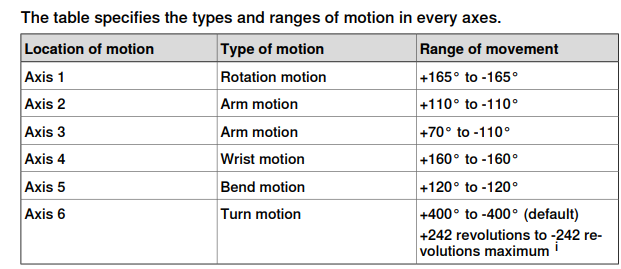

In [17]:
n = 100000

for i in range(n):
    q1 = round(random.uniform(np.deg2rad(-165), np.deg2rad(165)),4)
    q2 = round(random.uniform(np.deg2rad(-110), np.deg2rad(110)),4)
    q3 = round(random.uniform(np.deg2rad(-110), np.deg2rad(70)),4)
    q4 = round(random.uniform(np.deg2rad(-160), np.deg2rad(160)),4)
    q5 = round(random.uniform(np.deg2rad(-120), np.deg2rad(120)),4)
    q6 = round(random.uniform(np.deg2rad(0), np.deg2rad(360)),4)
    q = [q1,q2,q3,q4,q5,q6]
    T = robot.fkine(q)
    valor = np.array(T)
    roll,pitch,yaw = tr2rpy(np.array(valor))
    
    x = np.around(valor[0,-1], 5)
    y = np.around(valor[1,-1], 5)
    z = np.around(valor[2,-1], 5)

    nueva_fila = [q1,q2,q3,q4,q5,q6,roll,pitch,yaw,x,y,z]
    with open(archivo_csv, mode='a', newline='') as archivo:
        escritor_csv = csv.writer(archivo)
        escritor_csv.writerow(nueva_fila)

In [18]:
Titulo = ["Q1","Q2","Q3","Q4","Q5","Q6","Roll", "Pitch", "Yaw", "X","Y","Z"]
with open(archivo_csv, mode='r') as archivo_lectura, open('temp.csv', mode='w', newline='') as archivo_escritura:
    lector_csv = csv.reader(archivo_lectura)
    escritor_csv = csv.writer(archivo_escritura)
    escritor_csv.writerow(Titulo)
    for fila in lector_csv:
        escritor_csv.writerow(fila)
os.replace('temp.csv', archivo_csv)

In [19]:
data = pd.read_csv('datos_IRB120rpy.csv')
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Roll,Pitch,Yaw,X,Y,Z
0,-1.2725,0.1765,-0.2675,1.2871,1.7241,1.7746,2.670896,1.240142,3.079316,0.16306,-0.29789,0.63213
1,2.1500,-0.3738,0.5203,-0.9932,-0.1559,0.3500,1.673083,-0.938626,-2.514319,-0.16200,0.23058,0.56218
2,2.4630,0.0588,0.1829,2.5025,0.8853,1.4526,0.929903,0.714333,-2.159952,-0.31731,0.21315,0.58774
3,-0.2220,-1.2199,0.8517,1.3264,-0.6319,4.3036,0.664402,-1.002397,1.485717,0.04312,-0.05204,0.58733
4,-2.8115,-0.5678,0.7310,0.8337,1.6392,5.3698,-2.387837,-0.468515,-2.128698,-0.12604,-0.09941,0.49080


In [20]:
robot.fkine([-1.2725,	0.1765,	-0.2675,	1.2871,	1.7241,	1.7746])

  -0.324    -0.3726    0.8696    0.1631    
   0.02021   0.9162    0.4002   -0.2979    
  -0.9458    0.1472   -0.2894    0.6321    
   0         0         0         1         


### New IRB140

In [4]:
robot = rtb.models.DH.IRB140()
robot

DHRobot: IRB 140 (by ABB), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬───────┬──────┬────────┬─────────┬────────┐
│θⱼ  │  dⱼ   │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼───────┼──────┼────────┼─────────┼────────┤
│ q1 │ 0.352 │ 0.07 │ -90.0° │ -180.0° │ 180.0° │
│ q2 │     0 │ 0.36 │   0.0° │ -100.0° │ 100.0° │
│ q3 │     0 │    0 │ -90.0° │ -220.0° │  60.0° │
│ q4 │  0.38 │    0 │  90.0° │ -200.0° │ 200.0° │
│ q5 │     0 │    0 │ -90.0° │ -120.0° │ 120.0° │
│ q6 │ 0.065 │    0 │   0.0° │ -400.0° │ 400.0° │
└────┴───────┴──────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬──────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5   │
├─────┼─────┼──────┼───────┼─────┼──────┼──────┤
│  qr │  0° │ -90° │  90°  │  0° │  90° │ -90° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0°  │
│  qd │  0° │ -90° │  180° │  0° │  0°  │ -90° │
└─────┴─────┴──────┴───────┴─────┴──────┴──────┘

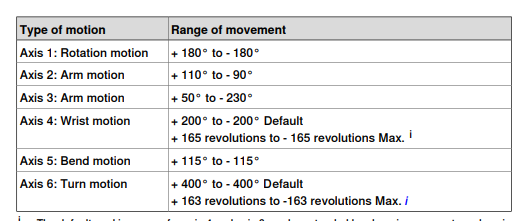

In [ ]:
robot.maxangle =[-pi pi; %Axis 1, minimum, maximum
                deg2rad(-100) deg2rad(100); %Axis 2, minimum, maximum
                deg2rad(-220) deg2rad(60); %Axis 3
                deg2rad(-200) deg2rad(200); %Axis 4: Unlimited (400� default)
                deg2rad(-120) deg2rad(120); %Axis 5
                deg2rad(-400) deg2rad(400)]; %Axis 6: Really Unlimited to (800� default)

In [21]:
archivo_csv = "datos_IRB140.csv"
archivo_existe = os.path.isfile(archivo_csv)

In [22]:
n = 50000

for i in range(n):
    q1 = round(random.uniform(np.deg2rad(-180), np.deg2rad(180)),4)
    q2 = round(random.uniform(np.deg2rad(110), np.deg2rad(90)),4)
    q3 = round(random.uniform(np.deg2rad(-230), np.deg2rad(50)),4)
    q4 = round(random.uniform(np.deg2rad(-200), np.deg2rad(200)),4)
    q5 = round(random.uniform(np.deg2rad(-115), np.deg2rad(115)),4)
    q6 = round(random.uniform(np.deg2rad(-400), np.deg2rad(400)),4)
    q = [q1,q2,q3,q4,q5,q6]
    T = robot.fkine(q)
    valor = np.array(T)
    roll,pitch,yaw = tr2rpy(np.array(valor))
    
    x = np.around(valor[0,-1], 5)
    y = np.around(valor[1,-1], 5)
    z = np.around(valor[2,-1], 5)

    nueva_fila = [q1,q2,q3,q4,q5,q6,roll,pitch,yaw,x,y,z]
    with open(archivo_csv, mode='a', newline='') as archivo:
        escritor_csv = csv.writer(archivo)
        escritor_csv.writerow(nueva_fila)

In [23]:
Titulo = ["Q1","Q2","Q3","Q4","Q5","Q6","Roll", "Pitch", "Yaw", "X","Y","Z"]
with open(archivo_csv, mode='r') as archivo_lectura, open('temp.csv', mode='w', newline='') as archivo_escritura:
    lector_csv = csv.reader(archivo_lectura)
    escritor_csv = csv.writer(archivo_escritura)
    escritor_csv.writerow(Titulo)
    for fila in lector_csv:
        escritor_csv.writerow(fila)
os.replace('temp.csv', archivo_csv)

In [24]:
data = pd.read_csv('datos_IRB140.csv')
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Roll,Pitch,Yaw,X,Y,Z
0,-1.8922,1.6694,-2.5307,-2.9245,1.7063,-6.0931,0.310199,0.529029,-1.710576,-0.12599,-0.33450,-0.20037
1,0.8078,1.8302,-0.9012,2.4696,1.2288,2.3951,-2.983873,-0.641380,1.832395,-0.24559,-0.20169,-0.27487
2,-2.3694,1.8888,-0.2693,-1.7910,-0.1600,1.3543,-1.372490,1.136919,-0.774904,0.35528,0.33191,0.03393
3,0.3878,1.8537,-1.9545,2.7362,0.9196,-0.2250,-2.735415,0.956467,-1.890548,0.04689,0.04118,-0.40618
4,2.6022,1.8995,0.7117,1.2157,1.1843,3.4361,-0.459022,0.995100,-2.742595,0.17074,-0.16800,0.37079


In [25]:
np.rad2deg(-1.8922)

-108.41507399465438

## Xarm6

In [7]:
class xarm6(rtb.DHRobot):
    def __init__(self):
        super().__init__(                
                [
                    rtb.RevoluteDH(offset=0, d=0.267, a=0,alpha=-np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0, a=0.2895,alpha=0),
                    rtb.RevoluteDH(offset=0, d=0, a=0.0775,alpha=-np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0.3435, a=0,alpha=np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0, a=0.076,alpha=-np.pi/2),
                    rtb.RevoluteDH(offset=0, d=0.097, a=0,alpha=0),
                ], name="Xarm6"
                        )
robot = xarm6()
robot

DHRobot: Xarm6, 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬────────┬────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │
├────┼────────┼────────┼────────┤
│ q1 │  0.267 │      0 │ -90.0° │
│ q2 │      0 │ 0.2895 │   0.0° │
│ q3 │      0 │ 0.0775 │ -90.0° │
│ q4 │ 0.3435 │      0 │  90.0° │
│ q5 │      0 │  0.076 │ -90.0° │
│ q6 │  0.097 │      0 │   0.0° │
└────┴────────┴────────┴────────┘

┌─┬──┐
└─┴──┘

In [13]:
robot.fkine([4.4771,	0.4565,	-1.6905,	1.9714,	1.1602,	1.0718])

   0.1334    0.6959    0.7057   -0.1153    
  -0.1578    0.7179   -0.6781   -0.7123    
  -0.9784   -0.02085   0.2056    0.08476   
   0         0         0         1         


In [8]:
archivo_csv = "datos_Xarm6.csv"
archivo_existe = os.path.isfile(archivo_csv)

In [9]:
n = 50000

for i in range(n):
    q1 = round(random.uniform(0, np.deg2rad(360)),4)
    q2 = round(random.uniform(0, np.deg2rad(90)),4)
    q3 = round(random.uniform(np.deg2rad(-180), np.deg2rad(-90)),4)
    q4 = round(random.uniform(0, np.deg2rad(180)),4)
    q5 = round(random.uniform(0, np.deg2rad(180)),4)
    q6 = round(random.uniform(0, np.deg2rad(360)),4)
    q = [q1,q2,q3,q4,q5,q6]
    T = robot.fkine(q)
    valor = np.array(T)
    roll,pitch,yaw = tr2rpy(np.array(valor))
    
    x = np.around(valor[0,-1], 5)
    y = np.around(valor[1,-1], 5)
    z = np.around(valor[2,-1], 5)

    nueva_fila = [q1,q2,q3,q4,q5,q6,roll,pitch,yaw,x,y,z]
    with open(archivo_csv, mode='a', newline='') as archivo:
        escritor_csv = csv.writer(archivo)
        escritor_csv.writerow(nueva_fila)

In [10]:
Titulo = ["Q1","Q2","Q3","Q4","Q5","Q6","Roll", "Pitch", "Yaw", "X","Y","Z"]
with open(archivo_csv, mode='r') as archivo_lectura, open('temp.csv', mode='w', newline='') as archivo_escritura:
    lector_csv = csv.reader(archivo_lectura)
    escritor_csv = csv.writer(archivo_escritura)
    escritor_csv.writerow(Titulo)
    for fila in lector_csv:
        escritor_csv.writerow(fila)
os.replace('temp.csv', archivo_csv)

In [12]:
data = pd.read_csv('datos_Xarm6.csv'
)
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Roll,Pitch,Yaw,X,Y,Z
0,4.4771,0.4565,-1.6905,1.9714,1.1602,1.0718,-0.101068,1.362678,-0.868754,-0.11526,-0.71229,0.08476
1,0.1267,0.6191,-2.4672,0.7812,0.6154,4.6054,1.785218,-0.639675,1.993469,0.65736,0.07943,0.30541
2,1.2796,0.2315,-1.5988,2.4480,0.7598,5.4512,-1.189422,-0.001468,0.202523,0.20982,0.72614,0.19109
3,0.7933,0.7902,-1.6798,2.0900,3.1106,4.8705,0.378420,-0.809036,0.255819,0.28123,0.38345,-0.00478
4,4.4972,0.6451,-2.7808,2.1101,1.5946,0.4433,-1.128481,-0.182932,-1.540767,-0.02717,-0.52126,0.42456
